# Individual project: Investigating changes in microbiome composition with age. 

## Read in and clean up data

In [1]:
import pandas as pd
data = pd.read_csv("microbiome data.csv", skiprows=3)
# Reading in the dataset


classification = data["Unnamed: 0"].str.split(";", expand=True)
# Split bacterial type column into separate classifications

group_data = (data[["Group 1", "Group 2", "Group 3", "Group 4", "Group 10", "Group 20", "Group 30", "Group 40", "Group 50", "Group 60", "Group 70", "Group 80", "Group 90", "Group 100"]])
# Specify numerical group data

group_columns = [f"Group {i}" for i in [1, 2, 3, 4, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]]

group_data_split = pd.concat([group_data[col].str.split("(", expand=True)[0] for col in group_columns], axis=1)
# Remove numbers in brackets from numerical group data

group_data_split.columns=["Group 1", "Group 2", "Group 3", "Group 4", "Group 10", "Group 20", "Group 30", "Group 40", "Group 50", "Group 60", "Group 70", "Group 80", "Group 90", "Group 100"]
# Rename group data columns

sep_data = pd.concat([classification, group_data_split], join="outer", axis=1)
# Add separate classification data to the group columns 

sep_data = sep_data.rename(columns={0:"Kingdom", 1:"Phylum", 2:"Class", 3:"Order", 4:"Family", 5:"Genus"})
# Name each classification column

sep_data

,Kingdom,Phylum,Class,Order,Family,Genus,Group 1,Group 2,Group 3,Group 4,Group 10,Group 20,Group 30,Group 40,Group 50,Group 60,Group 70,Group 80,Group 90,Group 100
0,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Lachnospiraceae,g__,0.05,0.24,9.95,21.52,20.45,24.63,19.34,16.47,19.81,21.01,14.4,9.02,4.35,2.43
1,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Lachnospiraceae,g__Blautia,0.07,0.28,15.19,16.83,15.2,18.53,18.35,18.99,19.13,17.08,10.45,7.46,5.86,1.74
2,k__Bacteria,p__Actinobacteria,c__Actinobacteria,o__Bifidobacteriales,f__Bifidobacteriaceae,g__Bifidobacterium,52.42,42.53,12.92,12.65,12.46,6.11,9.09,10.22,6.89,1.44,2.46,0.93,0.7,0.19
3,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Ruminococcaceae,g__,0.05,0.02,0.67,3.66,7.59,6.94,6.42,6.03,5.19,7.52,4.44,7.21,8.41,3.04
4,k__Bacteria,p__Bacteroidetes,c__Bacteroidia,o__Bacteroidales,f__Bacteroidaceae,g__Bacteroides,0.09,0.06,2.32,1.95,0.99,4.94,3.7,1.5,2.15,2.6,14.92,8.36,6.53,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,k__Bacteria,p__Proteobacteria,c__Betaproteobacteria,o__Nitrosomonadales,f__Nitrosomonadaceae,g__,0,0,0,0,0,0,0,0,0,0,0,0,0,0
183,k__Bacteria,p__Proteobacteria,c__Betaproteobacteria,o__Burkholderiales,f__Oxalobacteraceae,g__Janthinobacterium,0,0,0,0,0,0,0,0,0,0,0,0,0,0
184,k__Bacteria,p__Firmicutes,c__Erysipelotrichi,o__Erysipelotrichales,f__Erysipelotrichaceae,g__Clostridium,0,0,0,0,0,0,0,0,0,0,0,0,0,0
185,k__Bacteria,p__Bacteroidetes,c__Bacteroidia,o__Bacteroidales,f__Porphyromonadaceae,g__Paludibacter,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Extract family and genus info for over 1% abundance

In [2]:
sep_data["Gen_Fam"] = pd.concat([sep_data["Family"] + sep_data["Genus"]])
# Make one column containing family and genus data

genfam_data = sep_data.drop(["Kingdom", "Phylum", "Class", "Order", "Family", "Genus"], axis=1)
# Pull out just the genus and family for each bacteria

genfam_data_1percent = genfam_data.loc[0:11]
# Extract the data from genuses that compose on average over 1% of the microbiome across all ages

genfam_data_1percent = genfam_data_1percent.set_index(["Gen_Fam"])
# Set the family and genus as the index

genfam_data_1percent = genfam_data_1percent.transpose()
# Transpose data

average_age = [0.3, 0.8, 2.4, 6.1, 14.1, 25.9, 33.9, 43.8, 53.3, 63, 76.8, 83.3, 94.2, 101.3]
genfam_data_1percent['Average Age'] = average_age
# Add a column containing the averages ages for each group 

genfam_data_1percent = genfam_data_1percent.set_index(["Average Age"])
# Reset index

genfam_data_1percent = genfam_data_1percent.astype(float)
# Convert the whole dataset from string to float

genfam_data_1percent

Gen_Fam,f__Lachnospiraceaeg__,f__Lachnospiraceaeg__Blautia,f__Bifidobacteriaceaeg__Bifidobacterium,f__Ruminococcaceaeg__,f__Bacteroidaceaeg__Bacteroides,f__Lachnospiraceaeg__Coprococcus,f__Ruminococcaceaeg__Faecalibacterium,f__Ruminococcaceaeg__Ruminococcus,f__g__,f__Streptococcaceaeg__Streptococcus,f__Lachnospiraceaeg__[Ruminococcus],f__Lachnospiraceaeg__Dorea
Average Age,,,,,,,,,,,,
0.3,0.05,0.07,52.42,0.05,0.09,0.00,0.00,0.00,0.00,1.73,0.03,0.01
0.8,0.24,0.28,42.53,0.02,0.06,0.05,0.03,0.06,0.00,9.80,1.53,0.00
2.4,9.95,15.19,12.92,0.67,2.32,1.81,3.38,1.16,0.31,5.72,6.73,1.01
6.1,21.52,16.83,12.65,3.66,1.95,4.22,2.38,2.33,1.22,2.31,3.59,1.04
14.1,20.45,15.20,12.46,7.59,0.99,4.38,5.99,0.42,2.46,2.21,2.88,1.05
25.9,24.63,18.53,6.11,6.94,4.94,4.24,3.35,1.52,1.72,1.02,1.70,1.30
33.9,19.34,18.35,9.09,6.42,3.70,4.32,4.22,1.94,1.31,1.07,1.34,1.32
43.8,16.47,18.99,10.22,6.03,1.50,4.86,2.55,0.99,1.55,1.03,1.42,1.46
53.3,19.81,19.13,6.89,5.19,2.15,4.04,3.72,2.18,1.86,0.70,1.67,1.29


## Plotting the data

Text(0, 0.5, 'Abundance')

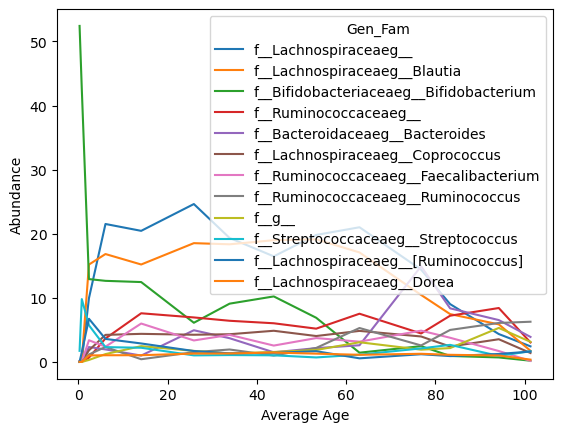

In [3]:
import matplotlib.pyplot as plt

genfam_data_1percent.plot()
# Plot abundance of different microbiome components against age

plt.ylabel("Abundance")
# Add a y axis label

## Calculate correlation

In [4]:
genfam_corr = genfam_data_1percent.reset_index()
# Reset the index to allow calculation of correlation

genfam_corr = genfam_corr.corr()
genfam_corr['Average Age']
# Calculate correlation between age and bacterial species

Gen_Fam
Average Age                                1.000000
f__Lachnospiraceaeg__                     -0.125086
f__Lachnospiraceaeg__Blautia              -0.154417
f__Bifidobacteriaceaeg__Bifidobacterium   -0.707522
f__Ruminococcaceaeg__                      0.516880
f__Bacteroidaceaeg__Bacteroides            0.626165
f__Lachnospiraceaeg__Coprococcus           0.217625
f__Ruminococcaceaeg__Faecalibacterium      0.034433
f__Ruminococcaceaeg__Ruminococcus          0.876039
f__g__                                     0.791015
f__Streptococcaceaeg__Streptococcus       -0.459259
f__Lachnospiraceaeg__[Ruminococcus]       -0.420098
f__Lachnospiraceaeg__Dorea                 0.243862
Name: Average Age, dtype: float64

## Linear regression model to predict abundance of one genus of bacteria based on age

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model
# Start a linear regression model

LinearRegression()

In [6]:
genfam_lr = genfam_data_1percent.reset_index()
# Reset the index to allow calculation of correlation

X = genfam_lr[["Average Age"]]
y = genfam_lr["f__Ruminococcaceaeg__Ruminococcus"]

model.fit(X, y)
# Set up the linear regression model with my dataset

LinearRegression()

In [7]:
pred = pd.DataFrame({"Average Age": [0, 102]})  
pred["y"] = model.predict(pred)  
pred
# Make a prediction and transfer into table

,Average Age,y
0,0,0.282776
1,102,5.702996


<Axes: xlabel='Average Age', ylabel='f__Ruminococcaceaeg__Ruminococcus'>

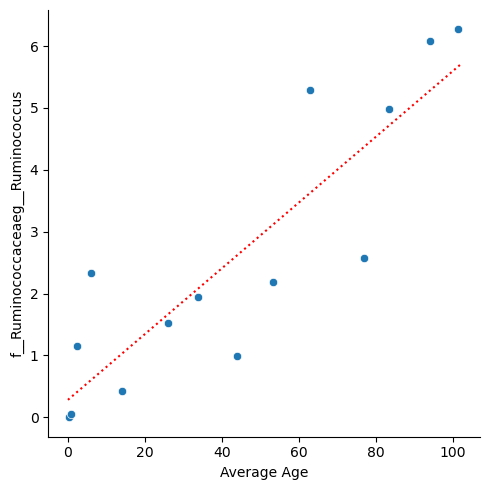

In [8]:
import seaborn as sns
sns.relplot(data=genfam_lr, x="Average Age", y="f__Ruminococcaceaeg__Ruminococcus")
sns.lineplot(data=pred, x="Average Age", y="y", c="red", linestyle=":")
# Plot the prediction from the linear regression model with the original data points

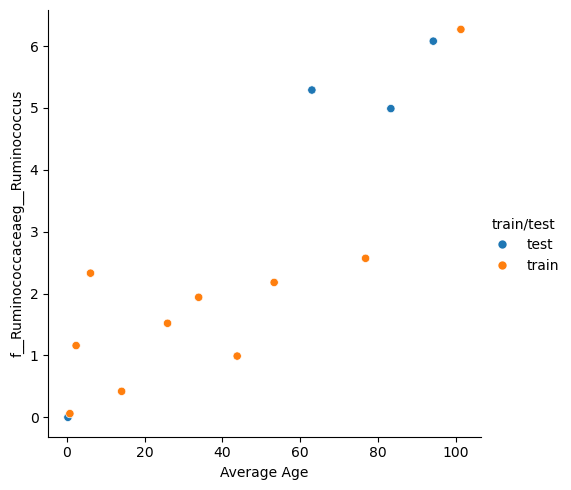

In [9]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

genfam_lr.loc[train_X.index, "train/test"] = "train"
genfam_lr.loc[test_X.index, "train/test"] = "test"
# Separate data into train and test subsets

sns.relplot(data=genfam_lr, x="Average Age", y="f__Ruminococcaceaeg__Ruminococcus", hue="train/test")
# Display these subsets on a graph

In [10]:
model = LinearRegression(fit_intercept=True)
model.fit(train_X, train_y)
# Redo the model using the training subset of the data

LinearRegression()

In [11]:
model.score(test_X, test_y)
# Check the model score to see if it is good at predicting test values

0.6026118674944115